In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from lassolver.utils.func import *
from lassolver.utils.signal import *
from lassolver.utils.utils import *

from lassolver.matrices.iid_gauss import iidGaussian
from lassolver.matrices.uni_invar import UniInvar

from lassolver.solver.amp import AMP
from lassolver.solver.oamp import OAMP

from lassolver.dsolver.d_amp import D_AMP
from lassolver.dsolver.d_oamp import D_OAMP

# 数値実験の設定

In [3]:
N = 4000
alpha = 0.5
M = int(alpha*N)
rho = 0.2

In [4]:
kappa = 5
P = 50
T = 20

In [5]:
x = bernouli_gaussian(N, rho)
SNR = 60

In [6]:
iidG = iidGaussian(M, N, 0, 1/M)
UniInv = UniInvar(M, N, kappa)

# i.i.d.ガウス行列での信号再構成

In [7]:
tmp1G = AMP(iidG.A, x, SNR)
tmp2G = D_AMP(iidG.A, x, SNR, P)
tmp3G = OAMP(iidG.A, x, SNR)
tmp4G = D_OAMP(iidG.A, x, SNR, P)

final mse: 0.07341901210167909


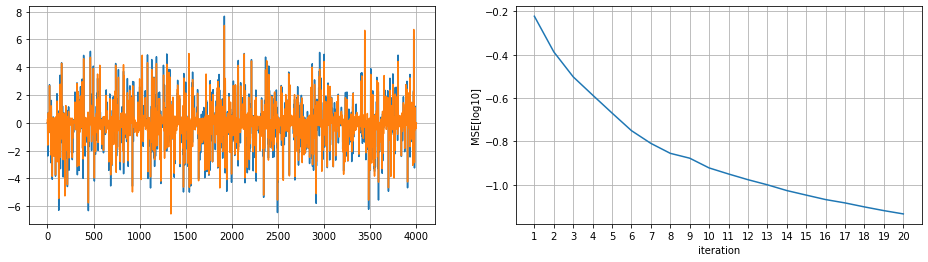

In [8]:
tmp1G.estimate(T=T)
tmp1G.result()

In [9]:
print("N(P-1): {}".format(N*(P-1)))
print("")
tmp2G.estimate(T=T, log=True)

N(P-1): 196000

1/20: tau = 1.9459304380970766, v = 0.9710180040776737
Rp: 79749.0 	 F: 1759 	 F\Rp: 52078
Total Communication Cost: 131827
2/20: tau = 1.1108969359407872, v = 0.5535012529995291
Rp: 80475.0 	 F: 1884 	 F\Rp: 55461
Total Communication Cost: 135936
3/20: tau = 0.6976693882989513, v = 0.3468874791786113
Rp: 85772.0 	 F: 2192 	 F\Rp: 61652
Total Communication Cost: 147424
4/20: tau = 0.5627312678858609, v = 0.27941841897206615
Rp: 85758.0 	 F: 2101 	 F\Rp: 59061
Total Communication Cost: 144819
5/20: tau = 0.45415365119971945, v = 0.2251296106289953
Rp: 84809.0 	 F: 2230 	 F\Rp: 62895
Total Communication Cost: 147704
6/20: tau = 0.39183701186017367, v = 0.19397129095922241
Rp: 84769.0 	 F: 2076 	 F\Rp: 58596
Total Communication Cost: 143365
7/20: tau = 0.30521023829591615, v = 0.1506579041770937
Rp: 87206.0 	 F: 2090 	 F\Rp: 57400
Total Communication Cost: 144606
8/20: tau = 0.28981659478305377, v = 0.14296108242066247
Rp: 83042.0 	 F: 2043 	 F\Rp: 58174
Total Communicatio

final mse: 0.21247045101046508


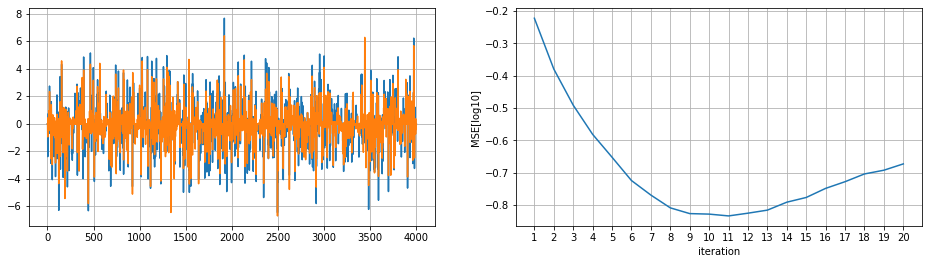

In [10]:
tmp2G.result()

final mse: 0.014976528527781197


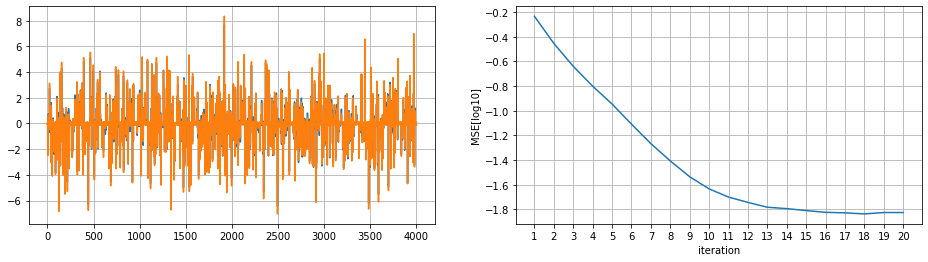

In [11]:
tmp3G.estimate(T=T)
tmp3G.result()

In [12]:
print("N(P-1): {}".format(N*(P-1)))
print("")
tmp4G.estimate(T=T, log=True)

N(P-1): 196000

1/20: tau = 0.9784546254798024, v = 0.9707039317270472
Rp: 131554.0 	 F: 1829 	 F\Rp: 31137
Total Communication Cost: 162691
2/20: tau = 0.518844265780305, v = 0.5111079972919373
Rp: 131638.0 	 F: 2058 	 F\Rp: 35008
Total Communication Cost: 166646
3/20: tau = 0.3465200005810747, v = 0.33881551547254835
Rp: 131073.0 	 F: 1906 	 F\Rp: 32547
Total Communication Cost: 163620
4/20: tau = 0.21674743162402668, v = 0.20908434719233152
Rp: 130996.0 	 F: 1975 	 F\Rp: 33598
Total Communication Cost: 164594
5/20: tau = 0.13578164903974232, v = 0.12818776145153968
Rp: 130615.0 	 F: 1993 	 F\Rp: 33978
Total Communication Cost: 164593
6/20: tau = 0.09943794665560722, v = 0.0919296772773402
Rp: 129832.0 	 F: 1994 	 F\Rp: 34116
Total Communication Cost: 163948
7/20: tau = 0.07119157352571273, v = 0.06378325141543904
Rp: 128993.0 	 F: 2011 	 F\Rp: 34652
Total Communication Cost: 163645
8/20: tau = 0.049609270856756926, v = 0.04234704662367348
Rp: 128075.0 	 F: 1985 	 F\Rp: 34169
Total C

final mse: 0.015267587548397124


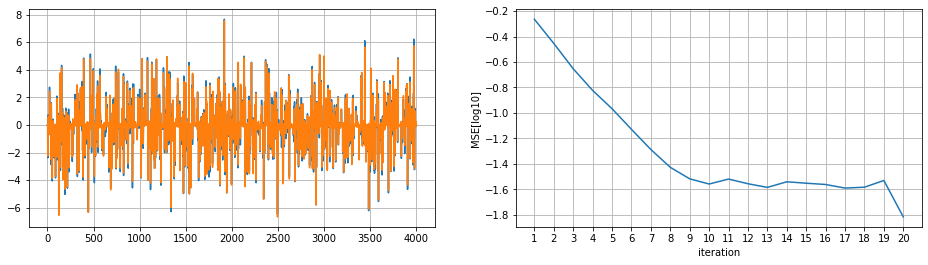

In [13]:
tmp4G.result()

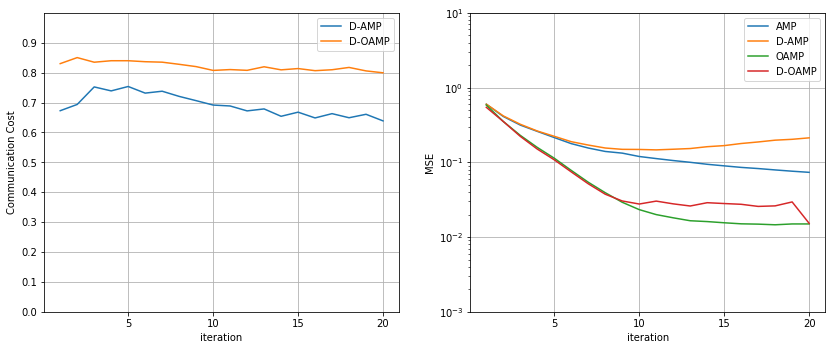

In [14]:
cc_dict = {"D-AMP": tmp2G.communication_cost, "D-OAMP": tmp4G.communication_cost}
mse_dict = {"AMP": tmp1G.mse, "D-AMP": tmp2G.mse, "OAMP": tmp3G.mse, "D-OAMP": tmp4G.mse}

plt.figure(figsize=(14, 5.5))
plt.subplot(121)
plt_CC(N, P, T, cc_dict)
plt.subplot(122)
plt_MSE(T, mse_dict)

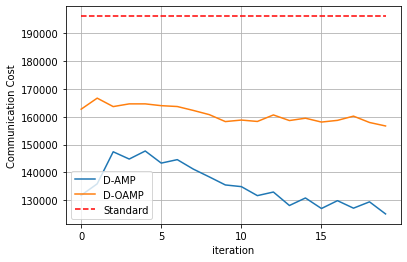

In [15]:
plt.xlabel("iteration")
plt.ylabel("Communication Cost")
plt.xticks(np.arange(0, T+1, 5))
plt.plot(tmp2G.communication_cost, label="D-AMP")
plt.plot(tmp4G.communication_cost, label="D-OAMP")
plt.plot(np.array([N * (P-1) for _ in range(T)]), ls='--', color='r', label="Standard")
plt.legend()
plt.grid()

# ユニタリ不変行列での信号再構成

In [16]:
tmp1U = AMP(UniInv.A, x, SNR)
tmp2U = D_AMP(UniInv.A, x, SNR, P)
tmp3U = OAMP(UniInv.A, x, SNR)
tmp4U = D_OAMP(UniInv.A, x, SNR, P)

final mse: 8.247066142674071e+37


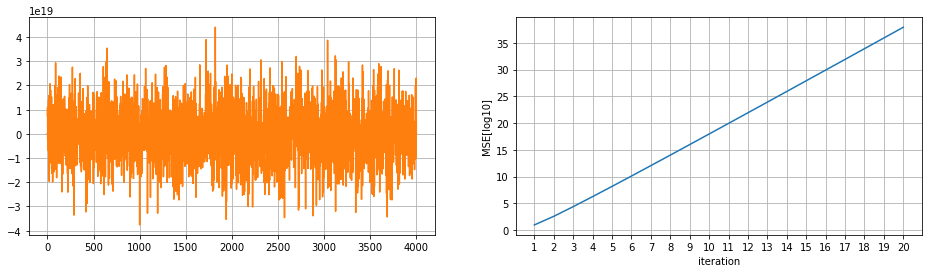

In [17]:
tmp1U.estimate(T=T)
tmp1U.result()

In [18]:
print("N(P-1): {}".format(N*(P-1)))
print("\n")
tmp2U.estimate(T=T, log=True)

N(P-1): 196000


1/20: tau = 2.0325916291529613, v = 1.011402057784957
Rp: 143231.0 	 F: 3020 	 F\Rp: 42648
Total Communication Cost: 185879
2/20: tau = 80.0515280252948, v = 40.02087025585588
Rp: 131850.0 	 F: 3051 	 F\Rp: 51733
Total Communication Cost: 183583
3/20: tau = 4072.6056738134985, v = 2036.2979431499577
Rp: 134070.0 	 F: 3103 	 F\Rp: 50835
Total Communication Cost: 184905
4/20: tau = 280044.1780262816, v = 140022.084119384
Rp: 134852.0 	 F: 3058 	 F\Rp: 49483
Total Communication Cost: 184335
5/20: tau = 21780488.449885212, v = 10890244.220048849
Rp: 135568.0 	 F: 3052 	 F\Rp: 48780
Total Communication Cost: 184348
6/20: tau = 1828856404.6678188, v = 914428202.3290157
Rp: 135743.0 	 F: 3029 	 F\Rp: 48287
Total Communication Cost: 184030
7/20: tau = 160631359350.7716, v = 80315679675.38092
Rp: 135832.0 	 F: 3019 	 F\Rp: 48073
Total Communication Cost: 183905
8/20: tau = 14590456842639.705, v = 7295228421319.849
Rp: 135948.0 	 F: 2999 	 F\Rp: 47707
Total Communication Cost: 1

final mse: 9.715584536487807e+37


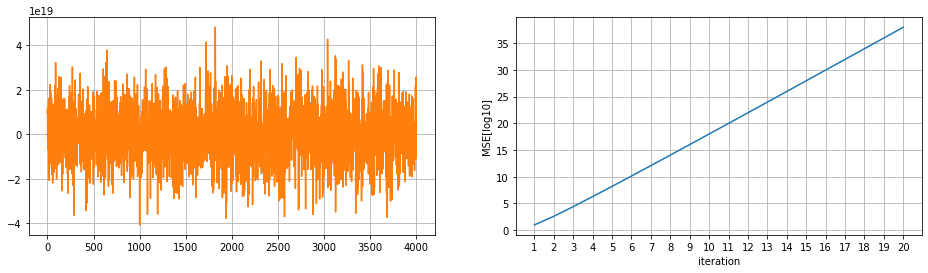

In [19]:
tmp2U.result()

final mse: 0.014884412919328996


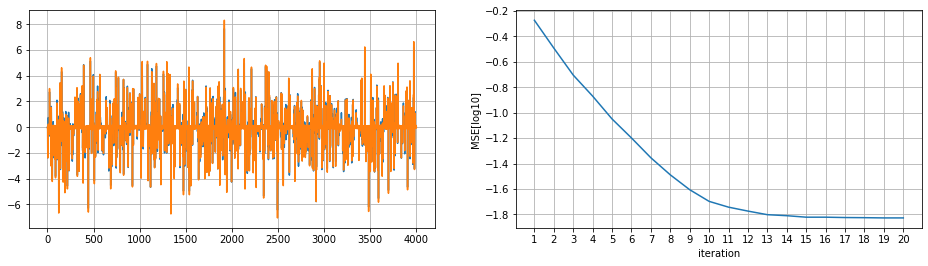

In [20]:
tmp3U.estimate(T=T)
tmp3U.result()

In [21]:
print("N(P-1): {}".format(N*(P-1)))
print("\n")
tmp4U.estimate(T=T, C=1.85, log=True)

N(P-1): 196000


1/20: tau = 1.020375373127301, v = 1.0113896845527877
Rp: 135264.0 	 F: 1680 	 F\Rp: 27135
Total Communication Cost: 162399
2/20: tau = 0.44529107221603215, v = 0.4363220869544431
Rp: 134827.0 	 F: 1945 	 F\Rp: 31486
Total Communication Cost: 166313
3/20: tau = 0.3094135248167357, v = 0.3004868722795559
Rp: 134436.0 	 F: 1921 	 F\Rp: 31123
Total Communication Cost: 165559
4/20: tau = 0.18067274169310013, v = 0.17179593228108037
Rp: 134176.0 	 F: 2029 	 F\Rp: 33178
Total Communication Cost: 167354
5/20: tau = 0.12996735600516934, v = 0.12116670554749488
Rp: 133692.0 	 F: 1957 	 F\Rp: 31834
Total Communication Cost: 165526
6/20: tau = 0.08504963114122849, v = 0.07634802591768387
Rp: 132954.0 	 F: 1974 	 F\Rp: 32204
Total Communication Cost: 165158
7/20: tau = 0.065277217698845, v = 0.056701128228566496
Rp: 131684.0 	 F: 1974 	 F\Rp: 32653
Total Communication Cost: 164337
8/20: tau = 0.045454631307346886, v = 0.03704438792566072
Rp: 130100.0 	 F: 1941 	 F\Rp: 32416
Total 

final mse: 0.00755651182598809


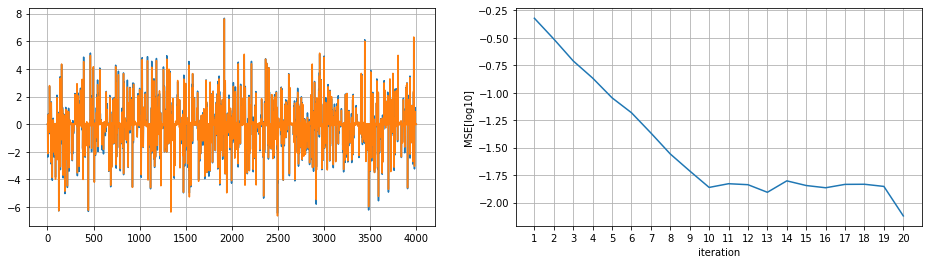

In [22]:
tmp4U.result()

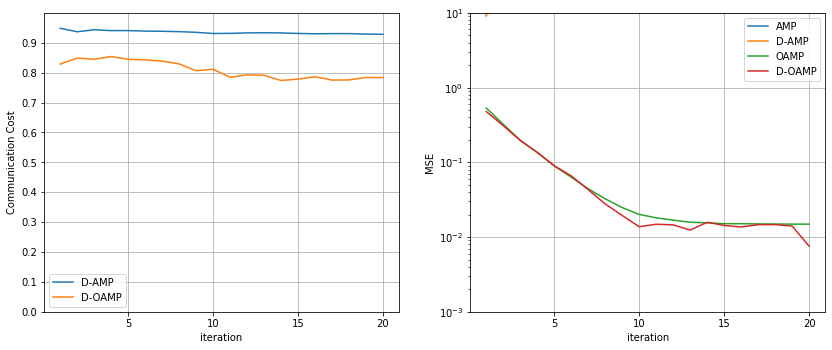

In [23]:
cc_dict = {"D-AMP": tmp2U.communication_cost, "D-OAMP": tmp4U.communication_cost}
mse_dict = {"AMP": tmp1U.mse, "D-AMP": tmp2U.mse, "OAMP": tmp3U.mse, "D-OAMP": tmp4U.mse}

plt.figure(figsize=(14, 5.5))
plt.subplot(121)
plt_CC(N, P, T, cc_dict)
plt.subplot(122)
plt_MSE(T, mse_dict)

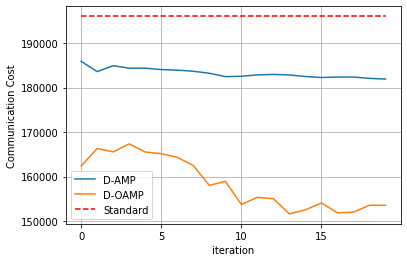

In [24]:
plt.xlabel("iteration")
plt.ylabel("Communication Cost")
plt.xticks(np.arange(0, T+1, 5))
plt.plot(tmp2U.communication_cost, label="D-AMP")
plt.plot(tmp4U.communication_cost, label="D-OAMP")
plt.plot(np.array([N * (P-1) for _ in range(T)]), ls='--', color='r', label="Standard")
plt.legend()
plt.grid()